# Descripción del proyecto

Eres analista en una gran tienda online. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos.

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados

In [13]:
# Cargar las librerias 

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [14]:
# Cargar dataset hypotheses: 
hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')

# Revisar las primeras filas de los datos para entender su estructura:
print("hypotheses: ")
display(hypotheses.head())


#Revisar la información general del DataFrame: 
display(hypotheses.info())

hypotheses: 


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


None

In [15]:
# Guardar el DataFrame como archivo Excel
hypotheses.to_excel('hypotheses_us.xlsx', index=False)
print(hypotheses)

                                                                                                               Hypothesis  \
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
1                                                       Launch your own delivery service. This will shorten delivery time   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
4                                        Change the background color on the main page. This will increase user engagement   
5                                                     Add a customer review page. This will increase the number of orders   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   


In [16]:
# Muestra toda la columna 'Hypothesis' sin truncarla
pd.set_option('display.max_colwidth', None)
hypotheses['Hypothesis']

0                                               Add two new channels for attracting traffic. This will bring 30% more users
1                                                         Launch your own delivery service. This will shorten delivery time
2            Add product recommendation blocks to the store's site. This will increase conversion and average purchase size
3    Change the category structure. This will increase conversion since users will find the products they want more quickly
4                                          Change the background color on the main page. This will increase user engagement
5                                                       Add a customer review page. This will increase the number of orders
6                                   Show banners with current offers and sales on the main page. This will boost conversion
7                                  Add a subscription form to all the main pages. This will help you compile a mailing list
8       

In [17]:
# Cargar dataset orders: 
orders = pd.read_csv('orders_us.csv', sep=",")

# Revisar las primeras filas de los datos para entender su estructura:
print("orders: ")
display(orders.head())

#Revisar la información general del DataFrame: 
display(orders.info())

orders: 


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


None

In [18]:
# Cargar dataset visits: 
visits = pd.read_csv('visits_us.csv', sep=",")

# Revisar las primeras filas de los datos para entender su estructura:
print("visits: ")
display(visits.head())

#Revisar la información general del DataFrame: 
display(visits.info())

visits: 


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [19]:
# Cambiar las fechas de la columna "date" tanto en el DataFrame de "orders" como "visits"
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visits['date'] = pd.to_datetime(visits['date'], format='%Y-%m-%d')

#Comrobar que se hicieron los cambios
print("Tipos de datos en orders:\n", orders.dtypes)
print()
print("Tipos de datos en visits:\n", visits.dtypes)

Tipos de datos en orders:
 transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                 float64
group                    object
dtype: object

Tipos de datos en visits:
 date      datetime64[ns]
group             object
visits             int64
dtype: object


In [20]:
# Revisión de valores nulos
print("Valores nulos en hypotheses:\n", hypotheses.isnull().sum())
print("\n")
print("Valores nulos en orders:\n", orders.isnull().sum())
print("\n")
print("Valores nulos en visits:\n", visits.isnull().sum())

Valores nulos en hypotheses:
 Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64


Valores nulos en orders:
 transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


Valores nulos en visits:
 date      0
group     0
visits    0
dtype: int64


In [21]:
# Detección de duplicados

print("Duplicados en hypotheses:", hypotheses.duplicated().sum())
print("Duplicados en orders:", orders.duplicated().sum())
print("Duplicados en visits:", visits.duplicated().sum())

Duplicados en hypotheses: 0
Duplicados en orders: 0
Duplicados en visits: 0


In [22]:
# Priorización de hipótesis
# Para ordenar las hipótesis, utilizaremos el marco ICE, que toma en cuenta el impacto, la confianza y el esfuerzo


# Cargar el dataset hypotheses:
hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')

# Calcular el puntaje ICE
hypotheses['ICE_Score'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar por prioridad
hypotheses_sorted_ice = hypotheses.sort_values(by='ICE_Score', ascending=False)
print(hypotheses_sorted_ice[['Hypothesis', 'ICE_Score']])


                                                                                                               Hypothesis  \
8                                                        Launch a promotion that gives users discounts on their birthdays   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
1                                                       Launch your own delivery service. This will shorten delivery time   
5                                                     Add a customer review page. This will increase the number of orders   


En otras palabras: si una idea es muy impactante y confiable, pero requiere mucho esfuerzo, pierde prioridad frente a otras más simples con resultados similares.

In [23]:
# Aplicar el framework RICE que mide cuántos usuarios serán impactados por la hipótesis

# Calcular el puntaje RICE
hypotheses['RICE_Score'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

# Ordenar por prioridad
hypotheses_sorted_rice = hypotheses.sort_values(by='RICE_Score', ascending=False)
print(hypotheses_sorted_rice[['Hypothesis', 'RICE_Score']])

                                                                                                               Hypothesis  \
7                                Add a subscription form to all the main pages. This will help you compile a mailing list   
2          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
0                                             Add two new channels for attracting traffic. This will bring 30% more users   
6                                 Show banners with current offers and sales on the main page. This will boost conversion   
8                                                        Launch a promotion that gives users discounts on their birthdays   
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
1                                                       Launch your own delivery service. This will shorten delivery time   


1 Hipótesis con alto Reach aumentan su prioridad en RICE

- La hipótesis "Add a subscription form to all the main pages" sube al primer lugar en RICE (112.0) porque tiene un alcance amplio a muchos usuarios, mientras que en ICE estaba en tercer lugar.
- "Add product recommendation blocks to the store" también aumenta su prioridad en RICE porque afecta a un mayor número de visitantes.

2 Hipótesis con bajo Reach bajan en RICE

- "Launch a promotion that gives users discounts" estaba en primer lugar en ICE pero cae en RICE porque su alcance es limitado.
- "Change the background color on the main page" se mantiene como la de menor prioridad en ambos enfoques, ya que tiene poco impacto general.

3️ Hipótesis con esfuerzo bajo pero gran alcance se ven favorecidas en RICE

- "Add two new channels for attracting traffic" y "Show banners with current offers and sales" están más arriba en RICE porque tienen un alto Reach sin requerir grandes esfuerzos.

In [24]:
# Comparar ICE vs RICE

# Comparar rankings de ICE y RICE
comparison = hypotheses_sorted_ice[['Hypothesis', 'ICE_Score']].merge(
    hypotheses_sorted_rice[['Hypothesis', 'RICE_Score']], on='Hypothesis', how='left')
print(comparison)

                                                                                                               Hypothesis  \
0                                                        Launch a promotion that gives users discounts on their birthdays   
1                                             Add two new channels for attracting traffic. This will bring 30% more users   
2                                Add a subscription form to all the main pages. This will help you compile a mailing list   
3                                 Show banners with current offers and sales on the main page. This will boost conversion   
4          Add product recommendation blocks to the store's site. This will increase conversion and average purchase size   
5                                                       Launch your own delivery service. This will shorten delivery time   
6                                                     Add a customer review page. This will increase the number of orders   


El factor Reach es determinante en la priorización de hipótesis. Mientras que ICE favorece hipótesis con alto impacto y confianza, RICE valora aquellas que pueden afectar a más usuarios.

Esto sugiere que, en una estrategia centrada en maximizar la cantidad de usuarios impactados, RICE sería el mejor marco para la toma de decisiones. Si en cambio el foco está en optimizar cambios con menor esfuerzo, ICE puede ser más útil.

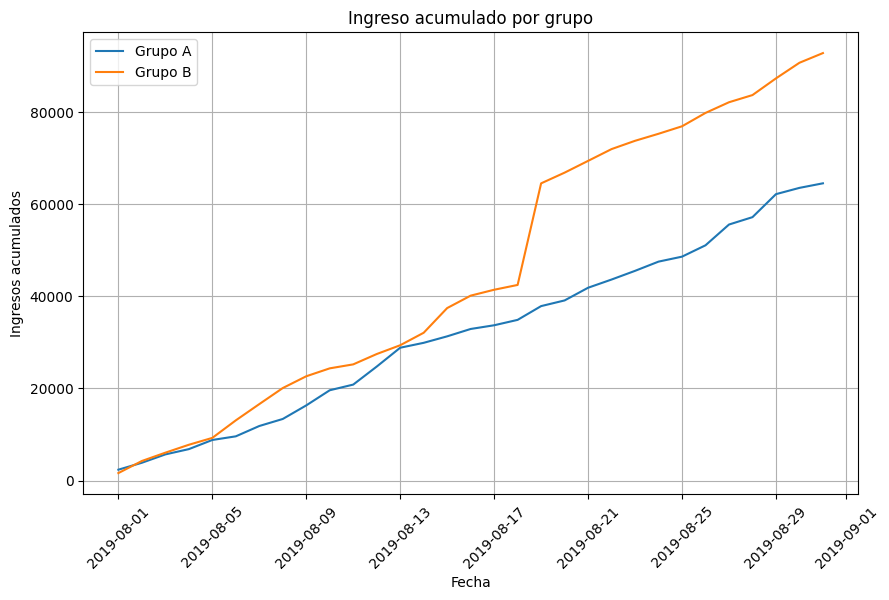

In [25]:
# Ingreso acumulado por grupo

# Calcular ingresos acumulados
orders_grouped = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()
orders_grouped['revenue_cumsum'] = orders_grouped.groupby('group')['revenue'].cumsum()

# Graficar ingresos acumulados
plt.figure(figsize=(10, 6))
for group in ['A', 'B']:
    subset = orders_grouped[orders_grouped['group'] == group]
    plt.plot(subset['date'], subset['revenue_cumsum'], label=f'Grupo {group}')

plt.xlabel('Fecha')
plt.ylabel('Ingresos acumulados')
plt.title('Ingreso acumulado por grupo')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Conclusiones: 

- Grupo B supera consistentemente a Grupo A; A lo largo del tiempo, el grupo B ha logrado mayores ingresos acumulados, lo que sugiere una mejor estrategia de ventas, un público más receptivo o un mayor volumen de transacciones.

- Crecimiento sostenido pero a ritmos diferentes: Ambos grupos presentan un aumento en ingresos acumulados, pero el grupo B crece de manera más pronunciada, especialmente a mediados de agosto. Esto podría estar relacionado con una promoción, una campaña de marketing más efectiva o un cambio en la demanda.

- Estrategias y desempeño: Si los grupos representan diferentes enfoques de negocio (como distintos canales de venta, segmentos de clientes o estrategias de precios), se podría evaluar qué factores han influido en el rendimiento superior del grupo B y si es posible aplicarlos al grupo A.

- Eventos clave: La aceleración del ingreso acumulado en Grupo B a mediados de agosto sugiere un evento clave. Investigar qué ocurrió en esa fecha podría proporcionar información valiosa sobre qué tácticas han sido efectivas.


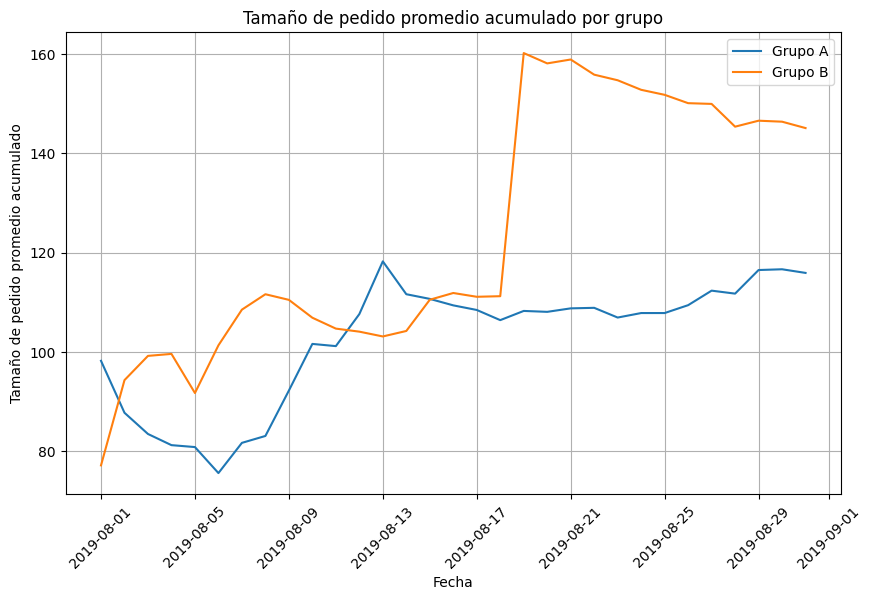

In [26]:
# 1. Calcular los ingresos y el número de pedidos por día y grupo
orders_grouped = orders.groupby(['date', 'group']).agg(
    revenue=('revenue', 'sum'),
    orders=('transactionId', 'nunique') # Contar pedidos únicos
).reset_index()

# 2. Calcular los ingresos acumulados y el número acumulado de pedidos
orders_grouped['revenue_cumsum'] = orders_grouped.groupby('group')['revenue'].cumsum()
orders_grouped['orders_cumsum'] = orders_grouped.groupby('group')['orders'].cumsum()

# 3. Calcular el tamaño promedio de pedido acumulado
orders_grouped['avg_order_size_cumsum'] = orders_grouped['revenue_cumsum'] / orders_grouped['orders_cumsum']

# 4. Graficar el tamaño promedio de pedido acumulado
plt.figure(figsize=(10, 6))
for group in ['A', 'B']:
    subset = orders_grouped[orders_grouped['group'] == group]
    plt.plot(subset['date'], subset['avg_order_size_cumsum'], label=f'Grupo {group}')

plt.xlabel('Fecha')
plt.ylabel('Tamaño de pedido promedio acumulado')
plt.title('Tamaño de pedido promedio acumulado por grupo')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Conclusiones:

- Grupo B inicia con pedidos más grandes pero tiene una caída significativa: Inicialmente, el grupo B muestra un tamaño de pedido promedio mayor, pero luego experimenta una fuerte disminución y fluctuaciones. Esto podría indicar una estrategia de precios agresiva al inicio o una caída en la demanda.

- Grupo A mantiene un crecimiento más estable: Aunque el tamaño de pedido promedio de Grupo A es menor, su tendencia es más consistente y menos volátil. Esto sugiere que la estrategia de ventas o el tipo de clientes de este grupo genera compras más constantes.

- Eventos clave pueden haber afectado el rendimiento de Grupo B: La caída repentina podría deberse a factores como promociones que finalizaron, cambios en el mercado o ajustes en las condiciones de compra.

- Estrategia a futuro: Si el objetivo es maximizar el tamaño de los pedidos, se podría analizar qué impulsó los pedidos grandes de Grupo B al inicio y explorar si es sostenible sin causar caídas repentinas.


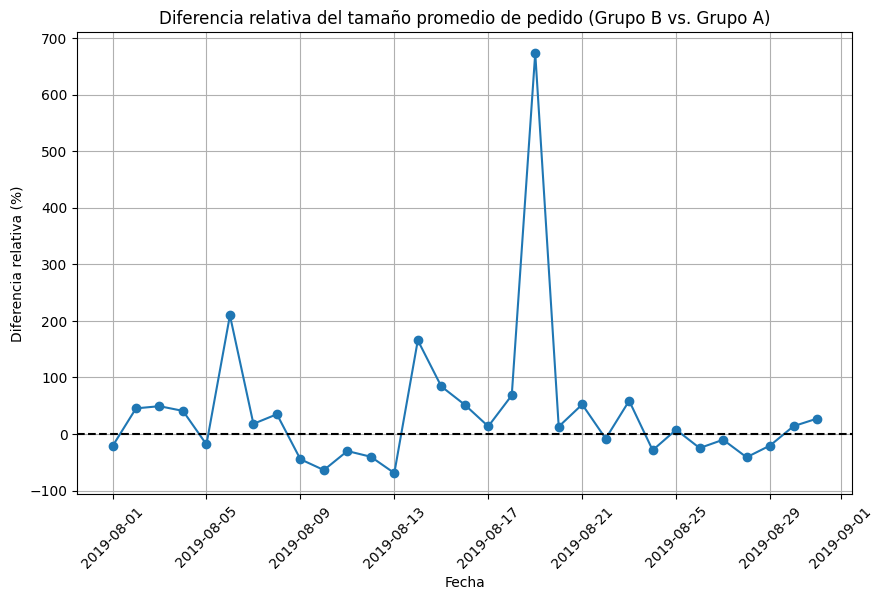

In [27]:
# 1. Calcular el tamaño promedio de pedido para cada día y grupo
orders_grouped = orders.groupby(['date', 'group']).agg(
    revenue=('revenue', 'sum'),
    orders=('transactionId', 'nunique') # Contar los pedidos únicos
).reset_index()

orders_grouped['avg_order_size'] = orders_grouped['revenue'] / orders_grouped['orders']

# 2. Crear una tabla pivote con las fechas como índice y los grupos como columnas
orders_pivot = orders_grouped.pivot(index='date', columns='group', values='avg_order_size')

# 3. Calcular la diferencia relativa en el tamaño promedio de pedido
orders_pivot['relative_diff'] = ((orders_pivot['B'] / orders_pivot['A']) - 1) * 100

# 4. Graficar la diferencia relativa
plt.figure(figsize=(10,6))  # Aumenté el tamaño para mejor legibilidad
plt.plot(orders_pivot.index, orders_pivot['relative_diff'], marker='o')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Diferencia relativa (%)') # Añadí el símbolo de porcentaje
plt.title('Diferencia relativa del tamaño promedio de pedido (Grupo B vs. Grupo A)')
plt.xticks(rotation=45)
plt.grid(True)  # Añadí una cuadrícula para facilitar la lectura
plt.show()

# Conclusiones:

- El pico extremo puede estar relacionado con una campaña especial, una promoción o un evento que afectó el comportamiento de compra del grupo B.
- Las fluctuaciones indican variabilidad en los hábitos de compra, lo que podría deberse a factores externos como días festivos, cambios en precios o disponibilidad de productos.
- Los días con diferencias negativas podrían significar un mejor desempeño del grupo A, lo que sería importante analizar para entender qué factores contribuyen a ello.
- Si el objetivo es mejorar el tamaño de pedido promedio del grupo B, sería útil investigar qué ocurrió alrededor del pico del 2019-08-17 para intentar replicar estrategias exitosas.

        date group  orders  visits  conversion_rate
0 2019-08-01     A      24     719         0.033380
1 2019-08-01     B      21     713         0.029453
2 2019-08-02     A      20     619         0.032310
3 2019-08-02     B      24     581         0.041308
4 2019-08-03     A      24     507         0.047337


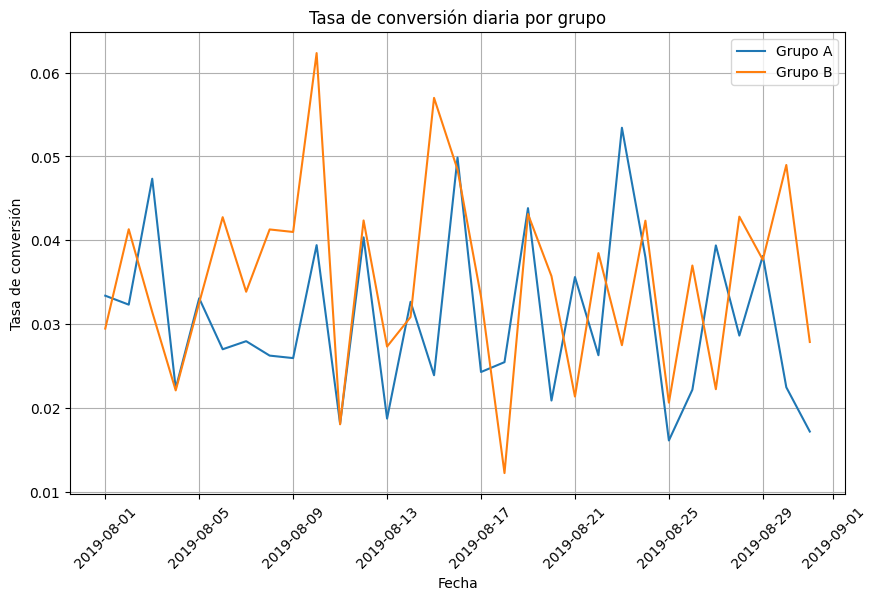

In [28]:
# Tasa de conversión por grupo como la relación entre los pedidos y el número de visitas de cada día

# 1. Agrupar los datos de pedidos y contar los pedidos
conversion_data = orders.groupby(['date', 'group'])['transactionId'].count().reset_index()
conversion_data = conversion_data.rename(columns={'transactionId': 'orders'}) # Renombrar la columna

# 2. Unir los datos de pedidos con los datos de visitas
conversion_data = conversion_data.merge(visits, on=['date', 'group'])

# 3. Calcular la tasa de conversión
conversion_data['conversion_rate'] = conversion_data['orders'] / conversion_data['visits']
print(conversion_data.head())

# 4. Graficar las tasas de conversión
plt.figure(figsize=(10, 6))  # Aumentar el tamaño
for group in ['A', 'B']:
    subset = conversion_data[conversion_data['group'] == group]
    plt.plot(subset['date'], subset['conversion_rate'], label=f'Grupo {group}')

plt.xlabel('Fecha')
plt.ylabel('Tasa de conversión')
plt.title('Tasa de conversión diaria por grupo')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)  # Añadir la cuadrícula
plt.show()

# Conclusiones:

- Comparación de tasas de conversión: Si el grupo B tiene una tasa de conversión más alta de manera constante, podría significar que su estrategia de ventas es más efectiva, su público es más receptivo o sus precios y ofertas generan mayor confianza en los clientes.

- Fluctuaciones en la conversión: Si las líneas muestran variaciones bruscas, esto podría estar relacionado con campañas promocionales, cambios en la plataforma, o factores externos como estacionalidad o tendencias de mercado.

- Puntos críticos: Identificar días donde la conversión cambia drásticamente puede ayudar a entender qué factores influyen en la eficiencia de cada grupo. Si el grupo A mejora su tasa en ciertos periodos, sería útil investigar qué cambió en esos momentos.

- Estrategias futuras: Si un grupo tiene una tasa de conversión consistentemente inferior, se pueden explorar mejoras como optimización del embudo de compra, incentivos, mejoras en la experiencia de usuario o campañas dirigidas a visitantes indecisos.

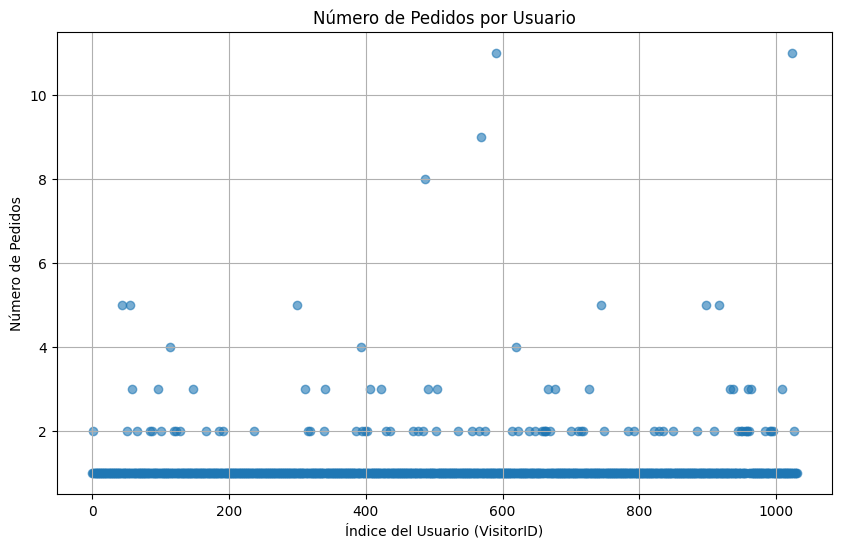


Estadísticas descriptivas del número de pedidos por usuario:
count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders_count, dtype: float64


In [29]:
# Traza un gráfico de dispersión del número de pedidos por usuario

# 1. Calcular el número de pedidos por usuario
orders_by_user = orders.groupby('visitorId')['transactionId'].nunique().reset_index()
orders_by_user = orders_by_user.rename(columns={'transactionId': 'orders_count'})

# 2. Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))  # Aumenté el tamaño para mejor visualización
plt.scatter(orders_by_user.index, orders_by_user['orders_count'], alpha=0.6)
plt.xlabel('Índice del Usuario (VisitorID)')
plt.ylabel('Número de Pedidos')
plt.title('Número de Pedidos por Usuario')
plt.grid(True)
plt.show()

# Mostrar algunas estadísticas descriptivas
print("\nEstadísticas descriptivas del número de pedidos por usuario:")
print(orders_by_user['orders_count'].describe())

# Observaciones:

- Distribución de pedidos: La mayoría de los usuarios han realizado entre 1 y 2 pedidos, lo que sugiere que la frecuencia de compra tiende a ser baja para la mayoría.

- Usuarios con pedidos elevados: Hay algunos usuarios que han realizado hasta 10 o 11 pedidos, lo que indica un grupo reducido de clientes recurrentes con alta actividad.

- Patrón de concentración: Se observa una clara agrupación en la parte baja del eje Y (entre 1 y 2 pedidos), lo que sugiere que la mayoría de los usuarios son compradores ocasionales.

- Posibles valores atípicos: Los usuarios con más de 10 pedidos pueden considerarse como compradores altamente leales o específicos, lo que puede ser relevante para estrategias de fidelización

In [30]:
# Calcula los percentiles 95 y 99 del número de pedidos por usuario.
# Define el punto en el cual un punto de datos se convierte en una anomalía.

# Calcular percentiles 95 y 99
percentile_95 = np.percentile(orders_by_user['orders_count'], 95)
percentile_99 = np.percentile(orders_by_user['orders_count'], 99)

print(f"Percentil 95: {percentile_95:.2f}")
print(f"Percentil 99: {percentile_99:.2f}")

# Filtrar usuarios anómalos usando query()
anomalous_users_95 = orders_by_user.query(f"orders_count > {percentile_95}")
anomalous_users_99 = orders_by_user.query(f"orders_count > {percentile_99}")

print(f"\nUsuarios con más pedidos que el percentil 95: {len(anomalous_users_95)}")
print(f"Usuarios con más pedidos que el percentil 99: {len(anomalous_users_99)}")

Percentil 95: 2.00
Percentil 99: 4.00

Usuarios con más pedidos que el percentil 95: 30
Usuarios con más pedidos que el percentil 99: 10


# Interpretación de los resultados:

- Percentil 95 = 2.0: Esto significa que el 95% de los usuarios han realizado 2 o menos pedidos. Cualquier usuario con más de 2 pedidos podría considerarse dentro del 5% superior de clientes más activos.
- Percentil 99 = 4.0: El 99% de los usuarios han realizado 4 o menos pedidos. Los usuarios con más de 4 pedidos están en el 1% más alto y pueden considerarse valores extremos o anomalías según el contexto.

# Cantidad de usuarios anómalos:
- 30 usuarios tienen más de 2 pedidos (percentil 95).
- 10 usuarios tienen más de 4 pedidos (percentil 99).

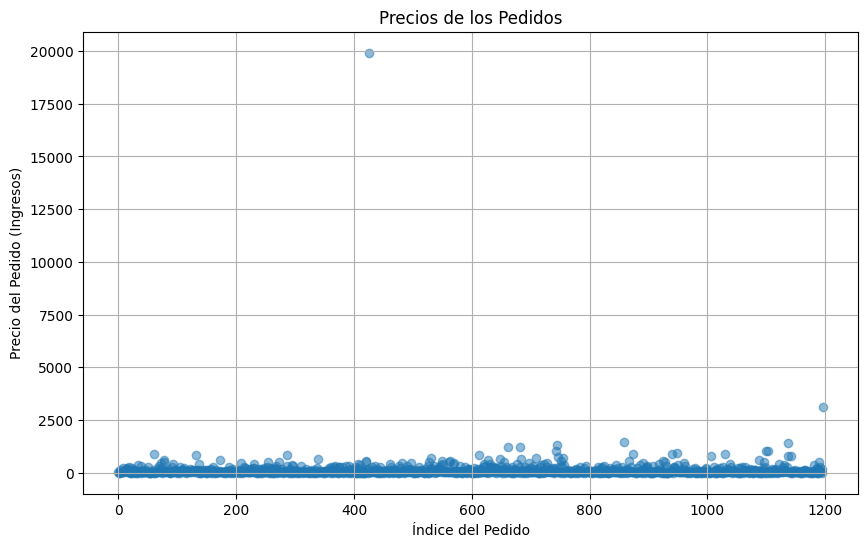


Estadísticas descriptivas de los precios de los pedidos:
count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64


In [31]:
# Traza un gráfico de dispersión de los precios de los pedidos

# 1. Crear el gráfico de dispersión de los precios de los pedidos
plt.figure(figsize=(10, 6))
plt.scatter(orders.index, orders['revenue'], alpha=0.5)  # 'alpha' para transparencia
plt.xlabel('Índice del Pedido')
plt.ylabel('Precio del Pedido (Ingresos)')
plt.title('Precios de los Pedidos')
plt.grid(True)
plt.show()

# 2. Mostrar algunas estadísticas descriptivas de los precios
print("\nEstadísticas descriptivas de los precios de los pedidos:")
print(orders['revenue'].describe())

#  conclusiones y conjeturas:

- Distribución de precios: La mayoría de los pedidos tienen precios relativamente bajos, como lo indica la concentración de puntos en la parte inferior del gráfico.
- Valores atípicos: Se observan algunos pedidos con precios excepcionalmente altos, lo que sugiere la existencia de transacciones poco frecuentes pero de gran valor.
- Desviación estándar alta: El precio promedio de un pedido es 131.49, pero la desviación estándar es 603.00, lo que indica una gran variabilidad en los precios.
- Diferencia entre media y mediana: La mediana es 50.20, mucho menor que la media, lo que sugiere una distribución sesgada hacia la derecha debido a algunos pedidos de alto valor.

 Observaciones: 
- Segmentación de clientes: Podría ser útil identificar qué tipo de clientes generan los pedidos más costosos para entender qué los motiva.
- Impacto de los valores atípicos: Los pedidos de alto valor pueden tener un gran impacto en el ingreso total. Una estrategia comercial podría enfocarse en atraer más clientes con estos hábitos de compra.
- Estrategias de precios: Dado que la mayoría de los pedidos son de bajo valor, podrías considerar promociones o descuentos que incentiven compras más grandes.
- Posibles anomalías: Podría valer la pena investigar los pedidos de mayor precio para verificar si son errores de registro o compras legítimas

In [32]:
# Calcula los percentiles 95 y 99 de los precios de los pedidos.
# Define el punto en el cual un punto de datos se convierte en una anomalía

# Calcular percentiles 95 y 99
percentile_95 = np.percentile(orders['revenue'], 95)
percentile_99 = np.percentile(orders['revenue'], 99)

print(f"Percentil 95: {percentile_95:.2f}")
print(f"Percentil 99: {percentile_99:.2f}")

# Filtrar pedidos anómalos
anomalous_orders_95 = orders.query(f"revenue > {percentile_95}")
anomalous_orders_99 = orders.query(f"revenue > {percentile_99}")

print(f"\nPedidos por encima del percentil 95: {len(anomalous_orders_95)}")
print(f"Pedidos por encima del percentil 99: {len(anomalous_orders_99)}")

Percentil 95: 435.54
Percentil 99: 900.90

Pedidos por encima del percentil 95: 60
Pedidos por encima del percentil 99: 12


Interpretartación:

- El 95% de los pedidos tiene un precio igual o menor a $435.54.
- Solo el 5% más alto supera ese monto, y el 1% más extremo sobrepasa los $900.90.
Esto confirma lo que ya intuías: hay una cola larga de pedidos muy elevados que distorsionan tus estadísticas (como el std de 603).

La prueba de Shapiro-Wilk se usa para evaluar si una muestra sigue una distribución Normal o no.
nos sirve para elegir el mejor método estadístico para comparar grupos (pruebas paramétricas vs. no paramétricas)

In [33]:
# Aplicar prueba de Shapiro-Wilk a los tamaños de pedido en el grupo A y B
stat_A, p_A = stats.shapiro(orders[orders['group'] == 'A']['revenue'])
stat_B, p_B = stats.shapiro(orders[orders['group'] == 'B']['revenue'])

print(f"Grupo A - Estadístico: {stat_A:.3f}, Valor p: {p_A:.5f}")
print(f"Grupo B - Estadístico: {stat_B:.3f}, Valor p: {p_B:.5f}")

# Interpretación de resultados
alpha = 0.05
if p_A < alpha:
    print("Los datos del Grupo A NO siguen una distribución normal.")
else:
    print("Los datos del Grupo A podrían seguir una distribución normal.")

if p_B < alpha:
    print("Los datos del Grupo B NO siguen una distribución normal.")
else:
    print("Los datos del Grupo B podrían seguir una distribución normal.")

Grupo A - Estadístico: 0.580, Valor p: 0.00000
Grupo B - Estadístico: 0.086, Valor p: 0.00000
Los datos del Grupo A NO siguen una distribución normal.
Los datos del Grupo B NO siguen una distribución normal.


In [34]:
# Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto

# 1. Calcular pedidos por usuario para cada grupo (incluyendo usuarios con 0 pedidos)
orders_by_user = orders.groupby(['group', 'visitorId'])['transactionId'].nunique().unstack(fill_value=0)

# 2. Obtener muestras de cada grupo
sample_A = orders_by_user.loc['A'].values
sample_B = orders_by_user.loc['B'].values

# 3. Realizar la prueba de Mann-Whitney U
alpha = 0.05
statistic, p_value = stats.mannwhitneyu(sample_A, sample_B)

# 4. Mostrar resultados
print(f"Resultados de la prueba de Mann-Whitney U:")
print(f"Estadístico U: {statistic:.2f}")
print(f"Valor p: {p_value:.5f}")

# 5. Interpretación de la significancia
if p_value < alpha:
    print("Conclusión: Hay una diferencia estadísticamente significativa en la conversión entre los grupos.")
else:
    print("Conclusión: No hay evidencia suficiente para afirmar una diferencia estadísticamente significativa.")

Resultados de la prueba de Mann-Whitney U:
Estadístico U: 488986.00
Valor p: 0.00035
Conclusión: Hay una diferencia estadísticamente significativa en la conversión entre los grupos.


# Conclusión:

- Si el valor p es menor que 0.05, entonces hay una diferencia significativa entre los grupos, lo que sugiere que uno tiene una tasa de conversión superior al otro.
- Si el valor p es mayor que 0.05, entonces no podemos concluir que haya una diferencia real y los grupos podrían comportarse de manera similar en términos de conversión.

In [35]:
# Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido
# entre los grupos utilizando los datos en bruto

# 1. Filtrar los datos para obtener el tamaño del pedido por grupo
# (apply(list)) Agrupa los valores de revenue directamente por grupo en lugar de calcular promedios por usuario

orders_grouped = orders.groupby('group')['revenue'].apply(list)

# 2. Realizar la prueba de Mann-Whitney U
alpha = 0.05
statistic, p_value = stats.mannwhitneyu(orders_grouped['A'], orders_grouped['B'])

# 3. Mostrar resultados
print(f"Resultados de la prueba de Mann-Whitney U:")
print(f"Estadístico U: {statistic:.2f}")
print(f"Valor p: {p_value:.5f}")

# 4. Interpretación de la significancia
if p_value < alpha:
    print("Conclusión: Hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos.")
else:
    print("Conclusión: No hay evidencia suficiente para afirmar una diferencia estadísticamente significativa.")

Resultados de la prueba de Mann-Whitney U:
Estadístico U: 175872.50
Valor p: 0.69152
Conclusión: No hay evidencia suficiente para afirmar una diferencia estadísticamente significativa.


In [36]:
# Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados

# 1. Filtrar los datos
filtered_orders = orders[(orders['revenue'] > 0)]  # Ejemplo: eliminar pedidos sin ingresos

# 2. Agrupar pedidos por usuario y grupo para calcular conversiones
orders_filtered_by_user = filtered_orders.groupby(['group', 'visitorId'])['transactionId'].nunique().unstack(fill_value=0)

# 3. Obtener muestras por grupo
sample_A = orders_filtered_by_user.loc['A'].values
sample_B = orders_filtered_by_user.loc['B'].values

# 4. Realizar la prueba de Mann-Whitney U
alpha = 0.05
statistic, p_value = stats.mannwhitneyu(sample_A, sample_B)

# 5. Mostrar resultados
print(f"Resultados de la prueba de Mann-Whitney U para conversión en datos filtrados:")
print(f"Estadístico U: {statistic:.2f}")
print(f"Valor p: {p_value:.5f}")

# 6. Interpretación de la significancia
if p_value < alpha:
    print("Conclusión: Hay una diferencia estadísticamente significativa en la conversión entre los grupos.")
else:
    print("Conclusión: No hay evidencia suficiente para afirmar una diferencia estadísticamente significativa.")

Resultados de la prueba de Mann-Whitney U para conversión en datos filtrados:
Estadístico U: 488986.00
Valor p: 0.00035
Conclusión: Hay una diferencia estadísticamente significativa en la conversión entre los grupos.


In [37]:
# Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los 
# grupos utilizando los datos filtrados

# 1. Filtrar los datos 
filtered_orders = orders[orders['revenue'] > 0]  # Ejemplo: eliminar pedidos de valor 0

# 2. Agrupar los ingresos por grupo
orders_filtered_grouped = filtered_orders.groupby('group')['revenue'].apply(list)

# 3. Realizar la prueba de Mann-Whitney U
alpha = 0.05
statistic, p_value = stats.mannwhitneyu(orders_filtered_grouped['A'], orders_filtered_grouped['B'])

# 4. Mostrar resultados
print(f"Resultados de la prueba de Mann-Whitney U para tamaño promedio de pedido (datos filtrados):")
print(f"Estadístico U: {statistic:.2f}")
print(f"Valor p: {p_value:.5f}")

# 5. Interpretación de la significancia
if p_value < alpha:
    print("Conclusión: Hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos (datos filtrados).")
else:
    print("Conclusión: No hay evidencia suficiente para afirmar una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos (datos filtrados).")

Resultados de la prueba de Mann-Whitney U para tamaño promedio de pedido (datos filtrados):
Estadístico U: 175872.50
Valor p: 0.69152
Conclusión: No hay evidencia suficiente para afirmar una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos (datos filtrados).


Conclusiones: 

- Valor p alto (0.69152): Al ser mayor que 0.05, esto indica que las diferencias observadas pueden ser producto de la variabilidad natural en los datos y no de una verdadera diferencia entre los grupos.

- Coincidencia con la prueba anterior: Como el resultado es prácticamente el mismo antes y después de filtrar los datos, significa que los filtros no han afectado la percepción estadística del tamaño promedio de pedido.

Posibles razones:

- Ambos grupos pueden tener comportamientos de compra similares en términos de gasto promedio.
- Puede haber factores externos que influyan en el tamaño del pedido, pero que no sean distintos entre los grupos.
- Si había una expectativa de diferencia, quizá los filtros aplicados no fueron suficientes para aislarla.

# Conclusión Final:

# Conversión entre los grupos:

- Los resultados de Mann-Whitney U mostraron una diferencia estadísticamente significativa en la conversión entre los grupos, tanto en los datos en bruto como en los filtrados (p-value = 0.00035).

Dado que la conversión mostró una diferencia consistente y estadísticamente significativa, es recomendable considerar al grupo con mejor conversión como líder y optimizar estrategias basadas en sus características.

# Tamaño promedio de pedido:

- No encontramos evidencia estadísticamente significativa de una diferencia en el tamaño promedio de pedido entre los grupos, incluso después del filtrado (p-value = 0.69152).

- Esto indica que los grupos tienen patrones de gasto similares.

Por otro lado, como el tamaño promedio de pedido no mostró diferencias significativas, no es necesario seguir investigando ese aspecto y podemos asumir que no hay un impacto relevante en el comportamiento de compra en términos de gasto.

 Parar la prueba, adoptar el grupo líder en conversión y aplicar estrategias para maximizar los beneficios en función de los hallazgos.